<a href="https://colab.research.google.com/github/tankgauravgt/Content-Based-Genre-Classification-using-Temporal-and-Spectral-Features/blob/main/Initial%20Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
root = 'drive/My Drive/Storage/genre_classifier'

In [ ]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa as lr
import numpy as np
import warnings
import os

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
train_x = []
train_y = []

for i in os.listdir(root + '/train/')[0:120]:

    buf = lr.load(root + '/train/' + str(i), sr=44100)
    mid = len(buf[0]) / 88200
    buf = lr.load(root + '/train/' + str(i), sr=44100, offset=mid - 10, duration=20)
    
    train_x += [lr.feature.mfcc(buf[0], buf[1], hop_length=441)]
    
    if 'rock' in i:
        train_y += [np.array([0, 1])]
    else:
        train_y += [np.array([1, 0])]

In [ ]:
print('train_x array size:', len(train_x))
print('train_y array size:', len(train_y))

print('train_x example dim:', train_x[0].shape)
print('train_y example dim:', train_y[0].shape)

train_x array size: 120
train_y array size: 120
train_x example dim: (20, 2001)
train_y example dim: (2,)


In [ ]:
for i in range(120):
    train_x[i] = train_x[i][:, 0:2000].T

In [ ]:
print('train_x array size:', len(train_x))
print('train_y array size:', len(train_y))

print('train_x example dim:', train_x[0].shape)
print('train_y example dim:', train_y[0].shape)

train_x array size: 120
train_y array size: 120
train_x example dim: (2000, 20)
train_y example dim: (2,)


In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)

print('Input Shape:', train_x.shape)
print('Label Shape:', train_y.shape)

Input Shape: (120, 2000, 20)
Label Shape: (120, 2)


In [ ]:
test_x = []
test_y = []

for i in os.listdir(root + '/test/')[0:40]:

    buf = lr.load(root + '/test/' + str(i), sr=44100)
    mid = len(buf[0]) / 88200
    buf = lr.load(root + '/test/' + str(i), sr=44100, offset=mid - 10, duration=20)
    
    test_x += [lr.feature.mfcc(buf[0], buf[1], hop_length=441)]
    
    if 'rock' in i:
        test_y += [np.array([0, 1])]
    else:
        test_y += [np.array([1, 0])]

In [ ]:
print('test_x array size:', len(test_x))
print('test_y array size:', len(test_y))

print('test_x example dim:', test_x[0].shape)
print('test_y example dim:', test_y[0].shape)

test_x array size: 40
test_y array size: 40
test_x example dim: (20, 2001)
test_y example dim: (2,)


In [ ]:
for i in range(40):
    test_x[i] = test_x[i][:, 0:2000].T

In [ ]:
print('test_x array size:', len(test_x))
print('test_y array size:', len(test_y))

print('test_x example dim:', test_x[0].shape)
print('test_y example dim:', test_y[0].shape)

test_x array size: 40
test_y array size: 40
test_x example dim: (2000, 20)
test_y example dim: (2,)


In [ ]:
test_x = np.array(test_x)
test_y = np.array(test_y)

print('Input Shape:', test_x.shape)
print('Label Shape:', test_y.shape)

Input Shape: (40, 2000, 20)
Label Shape: (40, 2)


In [ ]:
class RNNSimpleModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        
        self.L1 = tf.keras.layers.SimpleRNN(50, return_sequences=False)
        self.L2 = tf.keras.layers.Dense(2, activation='softmax')
        
    def call(self, inputs):
        self.x = self.L1(inputs)
        self.x = self.L2(self.x)
        return self.x

In [ ]:
model = RNNSimpleModel()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_x, train_y, epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 260ms/step - loss: 0.9153 - accuracy: 0.4917
Epoch 2/500
4/4 [==============================] - 1s 292ms/step - loss: 0.7557 - accuracy: 0.5750
Epoch 3/500
4/4 [==============================] - 1s 262ms/step - loss: 0.6486 - accuracy: 0.6250
Epoch 4/500
4/4 [==============================] - 1s 298ms/step - loss: 0.5847 - accuracy: 0.6917
Epoch 5/500
4/4 [==============================] - 1s 274ms/step - loss: 0.5208 - accuracy: 0.7333
Epoch 6/500
4/4 [==============================] - 1s 270ms/step - loss: 0.4636 - accuracy: 0.7750
Epoch 7/500
4/4 [==============================] - 1s 267ms/step - loss: 0.4149 - accuracy: 0.7917
Epoch 8/500
4/4 [==============================] - 1s 263ms/step - loss: 0.3827 - accuracy: 0.8250
Epoch 9/500
4/4 [==============================] - 1s 264ms/step - loss: 0.3587 - accuracy: 0.8250
Epoch 10/500
4/4 [==============================] - 1s 276ms/step - loss: 0.3390 - accuracy: 0.8500
Epoch 11/

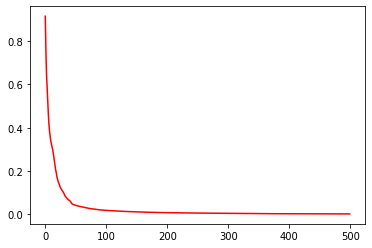

In [ ]:
plt.plot(hist.history['loss'], c='r')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(train_x, train_y)

4/4 [==============================] - 0s 73ms/step - loss: 0.0017 - accuracy: 1.0000


In [ ]:
test_loss, test_accuracy = model.evaluate(test_x, test_y)

2/2 [==============================] - 0s 43ms/step - loss: 0.0705 - accuracy: 0.9500


In [ ]:
print('Train Loss: ', train_loss)
print('Train Accuracy: ', 100 * train_accuracy)

print('Test Loss: ', test_loss)
print('Test Accuracy: ', 100 * test_accuracy)

Train Loss:  0.001674458384513855
Train Accuracy:  100.0
Test Loss:  0.07053597271442413
Test Accuracy:  94.9999988079071
